## 3장-5절. Decision Tree(의사결정나무)
- 설명
    - 데이터를 잘 분류할 수 있는 질문을 던져 가며 대상을 좁혀가는 '스무고개'와 비슷한 형식의 알고리즘
    - 분기해 나가는 구조가 Tree 구조와 같기 때문에 Decision Tree 라고 한다.
        - 불순도 최대한 감소하는 방향으로 조건을 만들어 학습을 진행
        - 하위노드는 yes/no 두 가지로 분기된다.
    - 머신러닝 모델들 중 몇 안되는 white box 모델로 결과에 대한 해석 가능
    - Overfitting이 발생하기 쉽다.
    - 앙상블 기반 알고리즘인 랜덤 포레스트와 많은 부스팅(Boosting) 기반 앙상블 모델들의 기반 알고리즘으로 사용된다.


- 순도
    - 서로 다른 종류의 값들이 섞여 있는 비율
    - 한 종류(class)의 값이 많을 수록 순도가 높고 불순도는 낮다.
    
    
- 용어
    - Root Node : 시작 Node
    - Decision Node (Intermediate Node) : 중간 Node
    - Leaf Node(Terminal Node) : 마지막 단계의 노드로 최종결과를 가짐
    
    
- 과적합(Overfitting) 문제
    - 모든 데이터셋이 모두 잘 분류되어 불순도가 0이 될때까지 분기해 나간다.
    - Root에서부터 하위 노드가 많이 만들어 질수록 모델이 복잡해져 과대적합이 발생할 수 있다.
    - 과적합을 막기 위해서는 적당한 시점에 하위노드가 더이상 생성되지 않도록 해야 한다.
        - Pruning(가지치기)라고 한다.
        
        
- 분류나무 하이퍼파라미터
    - 가지치기 관련 하이퍼파라미터
        - max_depth : 최대 깊이
        - max_leaf_nodes : 생성될 최대 Leaf Node 개수 제한
        - min_samples_left : 가지를 칠 최소 sample 수
            - sample 수가 지정한 값보다 작으면 불순도와 상관없이 가지를 치지 않는다.
    - criterion(판단기준)
        - 분류나무 = 불순도 계산방식
            - gini (default)
            - entropy
        - 회귀나무
            - mse
                - mse가 작아지는 값이 가장 큰 기준으로 나뉘어진다.(연속형 목표변수에 대한 분리기준은 각 마디의 불순도를 분산으로 표현하기에, 분산이 작아지는 값이 가장 큰 기준으로 자식마디를 형성한다. 이는 마디의 목표변수의 평균을 그 마디에 속하는 모든 개체의 예측값으로 사용하는 것을 고려한다면, 예측오차를 최소화 하는 것과 동일하다. 따라서 mse를 최소화 하는 것)
            
- Feature 중요도 조회
    - feature_importances
        - 모델을 만들 때 각 feature의 중요도를 반환
        - input data에서 중요한 feature를 찾기 위해 decision tree를 이용하기도 한다.
        
        
- 종류
    - 분류나무 : DecisionTreeClassifier() => 종속변수가 범주형
    - 회귀나무 : DecisionTreeRegressor() => 종속변수가 연속형

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---
---

## 데이터불러오기

In [2]:
wine_red = pd.read_csv('./data/winequality-red.csv',sep=';')
wine_white = pd.read_csv('./data/winequality-white.csv',sep=';')

In [3]:
wine_red['color'] = 1
wine_white['color'] = 0

In [4]:
wine_red.shape, wine_white.shape

((1599, 13), (4898, 13))

In [5]:
wine = pd.concat([wine_red,wine_white])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [7]:
wine['color'].value_counts()

0    4898
1    1599
Name: color, dtype: int64

In [8]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

wine[['quality']] = wine[['quality']].apply(LabelEncoder().fit_transform)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2,1


In [10]:
y = wine['color']
X = wine.drop(columns=['color'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y)

---
---

## 01. 분류분석

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
from sklearn.metrics import confusion_matrix, f1_score

pred_train = dt.predict(X_train)
pred_test = dt.predict(X_test)

In [13]:
confusion_matrix(y_train,pred_train)

array([[3427,    1],
       [   1, 1118]], dtype=int64)

In [14]:
confusion_matrix(y_test,pred_test)

array([[1445,   25],
       [   9,  471]], dtype=int64)

In [15]:
print('test f1_score:',f1_score(y_test,pred_test))

test f1_score: 0.9651639344262296


### 시각화

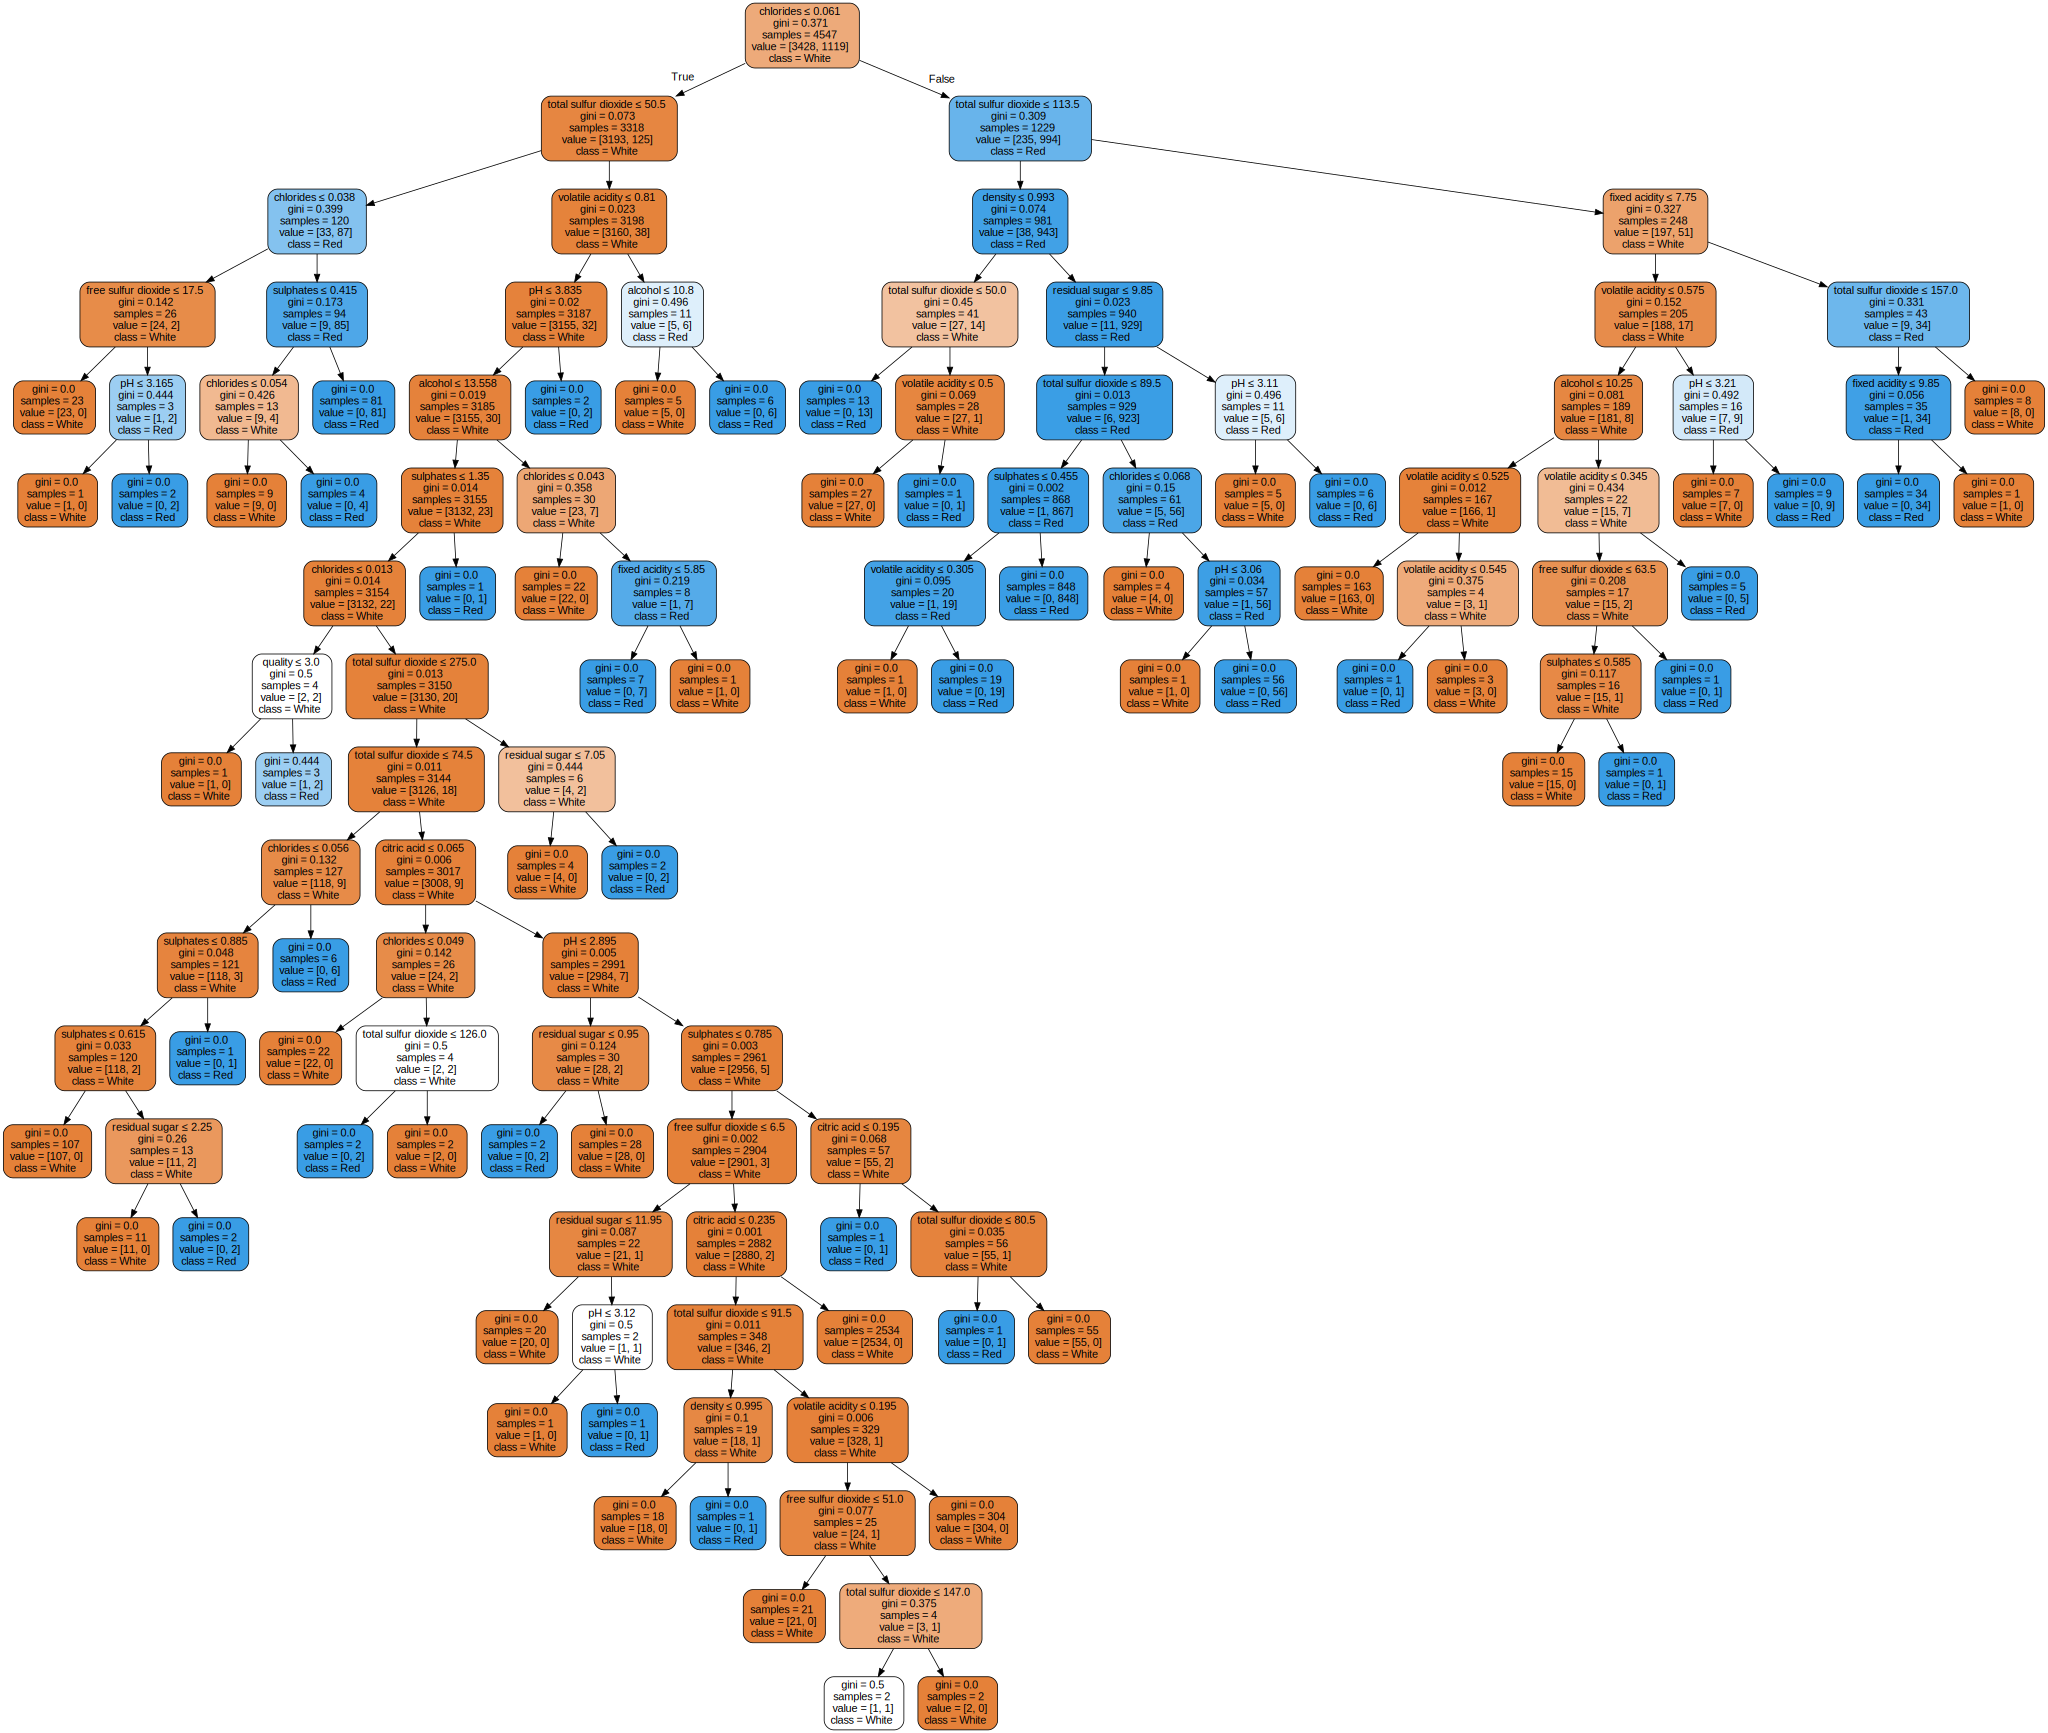

In [16]:
from sklearn.tree import export_graphviz
from graphviz import Source

eg = export_graphviz(dt,
                    out_file=None,#파일 밖에 저장여부
                    feature_names = X.columns,#X값
                    class_names = ['White','Red'],#y값
                    rounded = True,#반올림
                    filled=True,#색넣을지
                    special_characters=True)#특수문자허용여부

graph = Source(eg)
graph

---
---

### 변수중요도

In [17]:
dt.feature_importances_

array([2.33271605e-02, 1.55346005e-02, 1.30710047e-03, 8.93773467e-03,
       6.71050701e-01, 2.68316484e-03, 2.25645374e-01, 2.06357415e-02,
       1.29390929e-02, 1.02550044e-02, 7.28865455e-03, 3.95670631e-04])

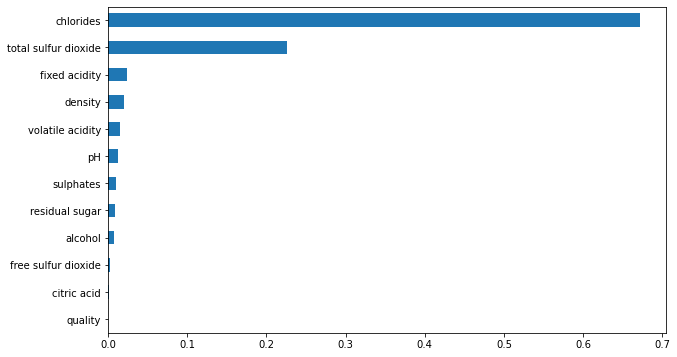

In [18]:
# 방법1

f_i = pd.Series(dt.feature_importances_, index=X_train.columns)
f_i.sort_values(ascending=False)

f_i.sort_values().plot(kind='barh', figsize=(10,6))
plt.show()

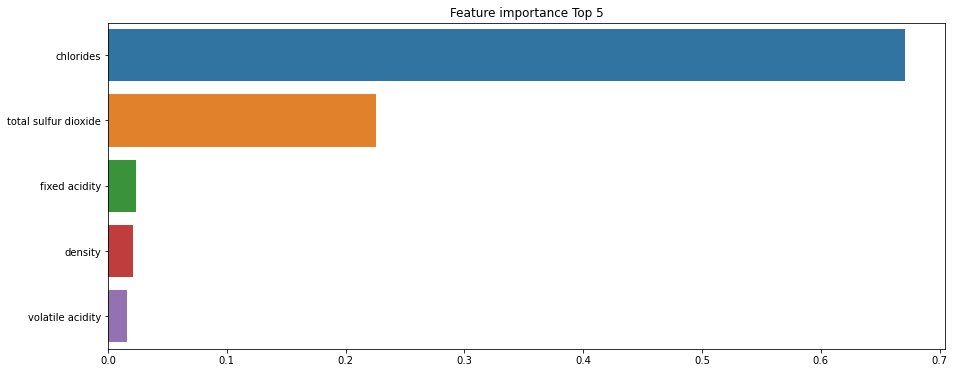

In [22]:
# 방법2

f_i = pd.Series(dt.feature_importances_, index=X_train.columns)
f_i_top5 = f_i.sort_values(ascending=False)[:5]

plt.figure(figsize=(15,6))
plt.title('Feature importance Top 5')
sns.barplot(x=f_i_top5, y= f_i_top5.index)
plt.show()

---
---

## 하이퍼파라미터 튜닝 후 중요변수시각화

In [78]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    'criterion':['gini','entropy'],
    'max_depth':range(3,15),
    'min_samples_leaf':range(5,51,5),
}

gs = GridSearchCV(DecisionTreeClassifier(),
                 param_grid = hyperparams,
                 cv=5,
                 n_jobs=-1,
                 scoring=['accuracy','recall','precision','f1'],
                 refit='accuracy')#평가지표

In [79]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 15),
                         'min_samples_leaf': range(5, 51, 5)},
             refit='accuracy',
             scoring=['accuracy', 'recall', 'precision', 'f1'])

In [81]:
best_model = gs.best_estimator_
f_i = best_model.feature_importances_
f_i_s = pd.Series(f_i, index=X_train.columns)
f_i_s.sort_values(ascending=False)

chlorides               0.607102
total sulfur dioxide    0.268454
volatile acidity        0.049173
density                 0.034910
pH                      0.020495
sulphates               0.010787
fixed acidity           0.006607
alcohol                 0.002158
free sulfur dioxide     0.000314
quality                 0.000000
residual sugar          0.000000
citric acid             0.000000
dtype: float64

<AxesSubplot:>

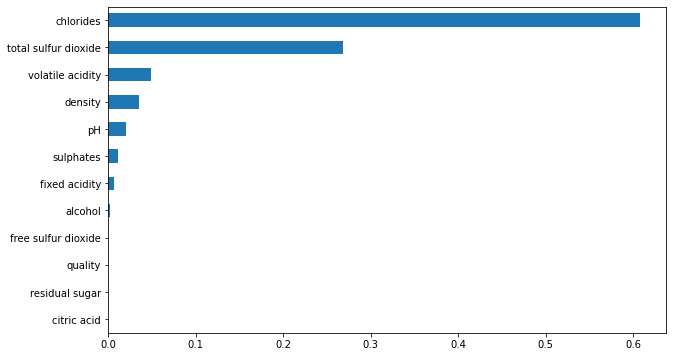

In [83]:
f_i_s.sort_values().plot(kind='barh', figsize=(10,6))

---
---

## 02. 회귀분석

In [95]:
# 데이터 만들기
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [97]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

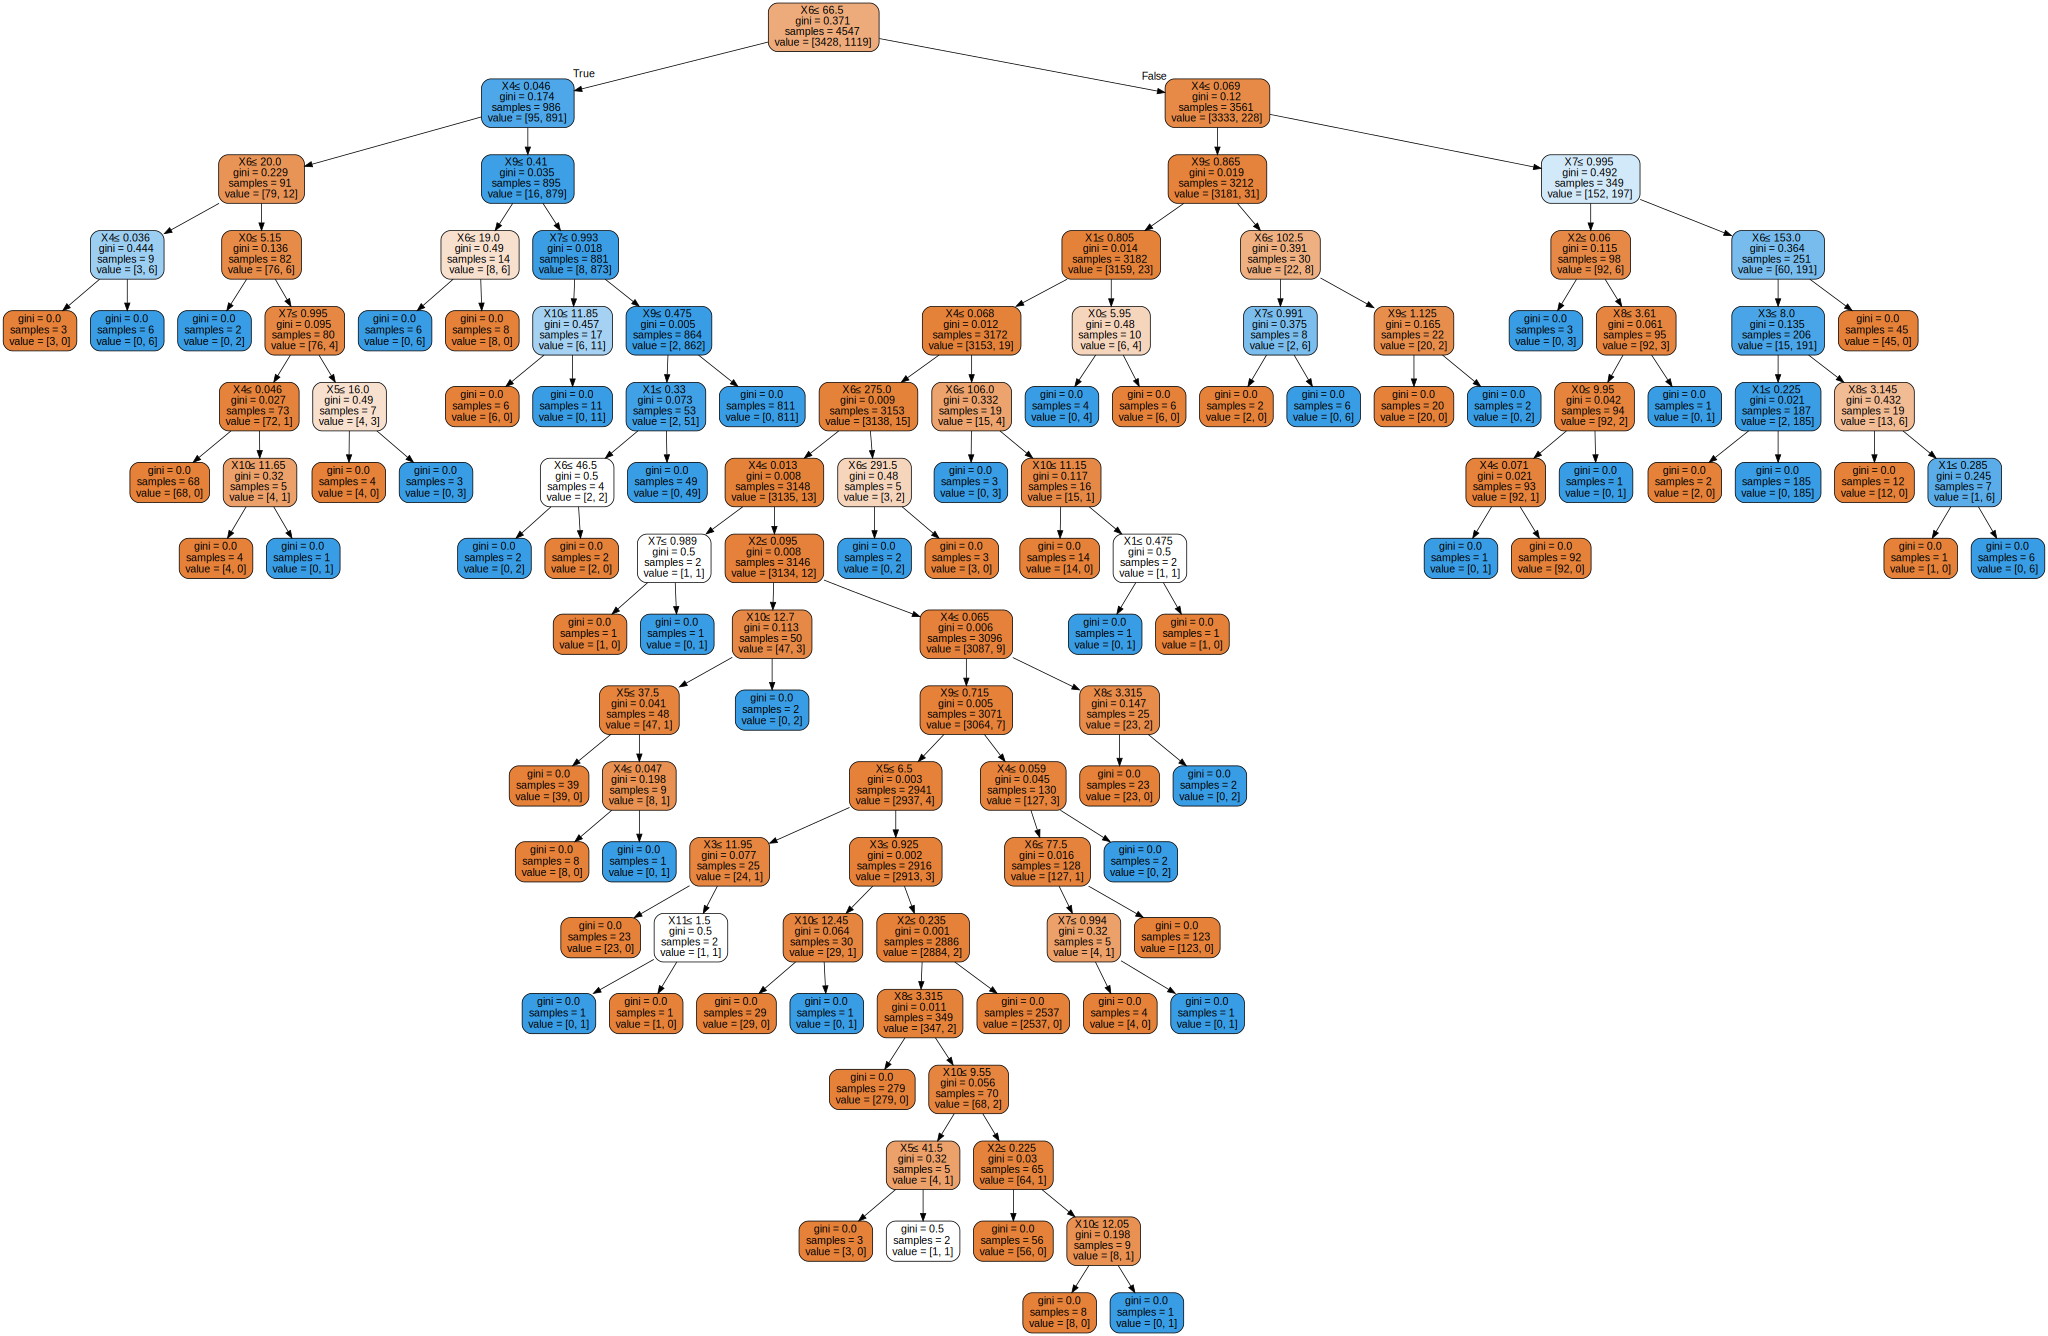

In [98]:
eg = export_graphviz(dt,
                    out_file=None,#파일 밖에 저장여부
                    rounded = True,#반올림
                    filled=True,#색넣을지
                    special_characters=True)#특수문자허용여부

graph = Source(eg)
graph

In [101]:
from sklearn.metrics import mean_squared_error
pred_train = dtr.predict(X_train)
pred_test = dtr.predict(X_test)

print(mean_squared_error(y_train, pred_train))
print(mean_squared_error(y_test, pred_test))

0.0
0.21315975448149335


In [117]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    'criterion':['mse','mae'],
    'max_depth':[None,2,3,4,5,6],
    'min_samples_leaf':range(5,51,5),
}

gs = GridSearchCV(DecisionTreeRegressor(),
                 param_grid=hyperparams,
                 cv=5,
                 scoring=['r2','neg_mean_absolute_error','neg_mean_squared_error'],
                 refit='neg_mean_squared_error')

In [118]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': range(5, 51, 5)},
             refit='neg_mean_squared_error',
             scoring=['r2', 'neg_mean_absolute_error',
                      'neg_mean_squared_error'])

In [119]:
print(gs.best_score_)
print(gs.best_estimator_)
print(gs.best_params_)

-0.17564907149935155
DecisionTreeRegressor(max_depth=2, min_samples_leaf=5)
{'criterion': 'mse', 'max_depth': 2, 'min_samples_leaf': 5}


In [124]:
pred_test_gs = gs.predict(X_test)
print(mean_squared_error(y_test, pred_test_gs))

0.08754243595587607
